<a href="https://colab.research.google.com/github/codebyalaa/codebyalaa/blob/main/moviecompany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' lets study movies' rating data;
- although nowadays rating is an industry secret and we sometimes don't fully know the accuracy, we can make sense of it.
- let's study a compnay that is in the entertainment domain
- name of company: movielens
- data source: https://grouplens.org/datasets/movielens/
- we will use in this study 3 main datasets:
        - movie.csv
        - ratings.csv
        - user.csv
- as a Data Scientist, lets analyze and create meaningful insights.
- the objective is to help the company to address their users in a better way.
'''

In [4]:
import pandas as pd
import numpy as np

movie = pd.read_csv('movie.csv')
ratings = pd.read_csv('ratings.csv')
user= pd.read_csv('user.csv')


In [2]:
# checking to see if the data was uploaded successfuly
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# understanding the user.csv
user.shape #(rows,columns)

(943, 5)

In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [9]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [13]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


here we can see the ratings range from 1 to 5.

let's dig deeper!

##How many movies belong to a particular genre?


In [14]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [20]:
genres = ['Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']

In [21]:
len(genres)

18

In [22]:
genres

['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [23]:
movie[genres].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [24]:
movie[genres].sum().sort_values(ascending= False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

Insight:
- there are 18 movie genres
- Drama genre has the highest number of movies (725) then comedy (505).
- the top 5 genres: Drama, Comedy, Action, Thriller, Romance.
- Fantasy genre has the lowest number of movies.

##What about movies with more than one genre?


In [25]:
movie['Number of Genres']= movie.loc[:,genres].sum(axis=1)

In [26]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3


In [27]:
movie[movie['Number of Genres']>1]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1669,MURDER and murder,20-Jun-97,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
1667,1670,Tainted,1-Feb-98,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
1670,1673,Mirage,1-Jan-95,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1676,1679,B. Monkey,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [ ]:
# there are 849 movies that have more than one genres.

In [28]:
movie.shape

(1680, 22)

since 849 is half of 1680 that means half of the movies (50%) are having more than one genres.

##Can we find the most liked genres by users?

In [29]:
df_merge = movie.merge(ratings, on = 'movie id', how = 'inner')
df_merge.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,66,3,883601324


In [30]:
genres

['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [31]:
for i in genres:
    print(i, ':', df_merge[df_merge[i]==1].rating.mean())

Action : 3.480245417953027
Adventure : 3.503526503308369
Animation : 3.5766990291262135
Childrens : 3.3532442216652742
Comedy : 3.3940734781442745
Crime : 3.6322780881440098
Documentary : 3.6728232189973613
Drama : 3.6873793708484772
Fantasy : 3.2152366863905324
Film-Noir : 3.9215233698788228
Horror : 3.2903893172841827
Musical : 3.521396851029471
Mystery : 3.63813155386082
Romance : 3.621704948358255
Sci-Fi : 3.5607227022780834
Thriller : 3.5090069495245064
War : 3.815811874866993
Western : 3.6132686084142396


Insight:
- Film Noir genre has the highest average ratings of 3.92 then War with 3.81 average rating.
- Fantasy genre is having the lowest average rating of 3.21.
- Only 5 genres have received a rating below 3.5 which means mean is around 72% of all 18 genres are rated above average.

##What about the most preferred movies by users?

In [32]:
df_merge.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,66,3,883601324


In [33]:
avg_rating = df_merge.groupby(['movie title'])[['rating']].mean().reset_index()
avg_rating

,movie title,rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390
...,...,...
1652,Young Guns,3.207921
1653,Young Guns II,2.772727
1654,"Young Poisoner's Handbook, The",3.341463
1655,Zeus and Roxanne,2.166667


In [34]:
avg_rating.rename(columns={'rating':'Avg_rating'}, inplace=True)
avg_rating.head()

,movie title,Avg_rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390


In [35]:
avg_rating.sort_values(ascending=False, by= 'Avg_rating')

,movie title,Avg_rating
631,"Great Day in Harlem, A",5.0
1170,Prefontaine,5.0
1354,Someone Else's America,5.0
461,Entertaining Angels: The Dorothy Day Story,5.0
942,Marlene Dietrich: Shadow and Light (,5.0
...,...,...
111,Babyfever,1.0
834,Lashou shentan,1.0
1307,Shadows (Cienie),1.0
1304,Shadow of Angels (Schatten der Engel),1.0


In [36]:
avg_rating[avg_rating['Avg_rating']==5]

,movie title,Avg_rating
30,Aiqing wansui,5.0
461,Entertaining Angels: The Dorothy Day Story,5.0
631,"Great Day in Harlem, A",5.0
942,Marlene Dietrich: Shadow and Light (,5.0
1170,Prefontaine,5.0
1270,"Saint of Fort Washington, The",5.0
1274,Santa with Muscles,5.0
1354,Someone Else's America,5.0
1382,Star Kid,5.0
1466,They Made Me a Criminal,5.0


Insight:
- Great Day in Harlem, A, Prefontaine are top rated movies
- Shadow of Angles, Power 98 are least rated.
- There are 10 movies which have been rated as 5.

## Which movies are rated most of the time?

In [40]:
movie_count = df_merge.groupby(['movie title'])['rating'].count().reset_index()
movie_count

,movie title,rating
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41
...,...,...
1652,Young Guns,101
1653,Young Guns II,44
1654,"Young Poisoner's Handbook, The",41
1655,Zeus and Roxanne,6


In [41]:
movie_count.rename(columns={'rating':'Rating_counts'},inplace=True)
movie_count.head()

,movie title,Rating_counts
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41


In [43]:
movie_count.sort_values(ascending=False, by= 'Rating_counts')

,movie title,Rating_counts
1393,Star Wars,583
332,Contact,509
497,Fargo,508
1232,Return of the Jedi,507
858,Liar Liar,485
...,...,...
1085,"Object of My Affection, The",1
1088,Office Killer,1
1109,"Other Voices, Other Rooms",1
1123,Paris Was a Woman,1


Insight:
- Star Wars has been the most rated (583 times)
- Paris Was a Woman, Á köldum klaka (Cold Fever) have least rating counts.

In [44]:
movie_100 = movie_count[movie_count['Rating_counts']>100]
movie_100

,movie title,Rating_counts
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151
...,...,...
1627,Willy Wonka and the Chocolate Factory,326
1638,"Wizard of Oz, The",246
1646,"Wrong Trousers, The",118
1651,Young Frankenstein,200


since there are 334 movies which are rated ,more than 100 times by users, lets study the top 5 data.

In [45]:
avg_rating.head()

,movie title,Avg_rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390


In [46]:
movie_100.head()

,movie title,Rating_counts
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151


In [47]:
df_top= avg_rating.merge(movie_100, on = 'movie title', how= 'inner')
df_top

,movie title,Avg_rating,Rating_counts
0,101 Dalmatians,2.908257,109
1,12 Angry Men,4.344000,125
2,2001: A Space Odyssey,3.969112,259
3,Absolute Power,3.370079,127
4,"Abyss, The",3.589404,151
...,...,...,...
329,Willy Wonka and the Chocolate Factory,3.631902,326
330,"Wizard of Oz, The",4.077236,246
331,"Wrong Trousers, The",4.466102,118
332,Young Frankenstein,3.945000,200


In [49]:
df_top.sort_values(ascending=False, by = 'Avg_rating').head(25)

,movie title,Avg_rating,Rating_counts
63,"Close Shave, A",4.491071,112
260,Schindler's List,4.466443,298
331,"Wrong Trousers, The",4.466102,118
54,Casablanca,4.456790,243
269,"Shawshank Redemption, The",4.445230,283
248,Rear Window,4.387560,209
319,"Usual Suspects, The",4.385768,267
291,Star Wars,4.358491,583
1,12 Angry Men,4.344000,125
59,Citizen Kane,4.292929,198


In [50]:
df_top.sort_values(ascending=False, by = 'Rating_counts').head(25)

,movie title,Avg_rating,Rating_counts
291,Star Wars,4.358491,583
69,Contact,3.803536,509
107,Fargo,4.155512,508
251,Return of the Jedi,4.007890,507
178,Liar Liar,3.156701,485
99,"English Patient, The",3.656965,481
261,Scream,3.441423,478
309,Toy Story,3.878319,452
8,Air Force One,3.631090,431
159,Independence Day (ID4),3.438228,429


Insights:
- Star Wars has received max number counts with and average of 4.35 stars.

##What is the relationship between demographic details of the users and ratings for the movies?

In [51]:
#since movie and ratings datasets are merged as df_merge, lets add the user dataset.
df_merge_all = df_merge.merge(user, on = 'user id', how = 'inner')
df_merge_all.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,War,Western,Number of Genres,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,3,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,3,308,5,887737890,60,M,retired,95076
2,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,3,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,1-Jan-95,0,0,0,0,0,0,0,...,0,0,2,308,4,887738847,60,M,retired,95076
4,8,Babe,1-Jan-95,0,0,0,1,1,0,0,...,0,0,3,308,5,887736696,60,M,retired,95076


In [52]:
user['gender'].value_counts(normalize=True)

gender
M    0.710498
F    0.289502
Name: proportion, dtype: float64

Insight:
- 71% of users are male

In [53]:
df_merge_all.groupby('gender').rating.mean()

gender
F    3.531510
M    3.529333
Name: rating, dtype: float64

the average rating given by F and M is almost the same around 3.5

In [54]:
df_merge_all.groupby('occupation').rating.mean().sort_values(ascending=False)

occupation
none             3.777778
lawyer           3.735316
doctor           3.688889
educator         3.670692
artist           3.653380
administrator    3.635646
scientist        3.611273
salesman         3.582944
programmer       3.568205
librarian        3.560781
other            3.552335
engineer         3.541473
technician       3.532097
student          3.515167
marketing        3.485641
retired          3.466750
entertainment    3.440783
writer           3.376152
executive        3.349794
homemaker        3.301003
healthcare       2.896220
Name: rating, dtype: float64

Insight:
- users who work in the health care have given the lowest rate on average.
- users with no occubation have given the highest rate on average vs the users with occupation.

In [55]:
df_merge_all.groupby(['occupation', 'gender']).rating.mean()

occupation     gender
administrator  F         3.781839
               M         3.555233
artist         F         3.347065
               M         3.875841
doctor         M         3.688889
educator       F         3.699132
               M         3.660246
engineer       F         3.751724
               M         3.537676
entertainment  F         3.448889
               M         3.439807
executive      F         3.773756
               M         3.320340
healthcare     F         2.736021
               M         3.639839
homemaker      F         3.278810
               M         3.500000
lawyer         F         3.623188
               M         3.741379
librarian      F         3.580070
               M         3.537920
marketing      F         3.522624
               M         3.474801
none           F         3.632877
               M         3.876636
other          F         3.531114
               M         3.563447
programmer     F         3.577566
               M         3

Insight:
- only M doctors have given ratings not the F doctors.

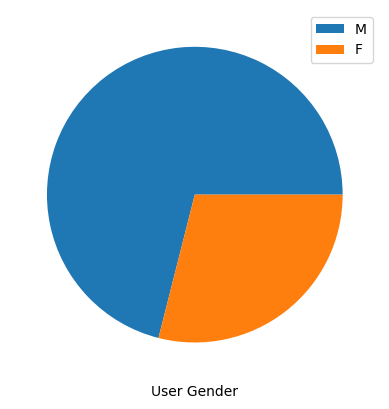

In [61]:
import matplotlib.pyplot as plt
y = np.array(user['gender'].value_counts(normalize=True))
plt.pie(y)
plt.xlabel('User Gender')
plt.legend(['M','F'])
plt.show()

In [96]:
df_user = pd.read_csv('user.csv')
df_movie = pd.read_csv('movie.csv')
df_rating= pd.read_csv('ratings.csv')

print("User DataFrame columns:", df_user.columns)
print("Movie DataFrame columns:", df_movie.columns)
print("Rating DataFrame columns:", df_rating.columns)

User DataFrame columns: Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')
Movie DataFrame columns: Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')
Rating DataFrame columns: Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')


In [94]:
userage = df_user[['user id', 'age']]
userage

,user id,age
0,1,24
1,2,53
2,3,23
3,4,24
4,5,33
...,...,...
938,939,26
939,940,32
940,941,20
941,942,48


In [97]:
usermovieid = df_rating[['user id', 'movie id']]
usermovieid

,user id,movie id
0,196,242
1,186,302
2,22,377
3,244,51
4,166,346
...,...,...
99995,880,476
99996,716,204
99997,276,1090
99998,13,225


In [98]:
movieidtitle = df_movie[['movie id', 'movie title']]
movieidtitle

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat
...,...,...
1675,1678,Mat' i syn
1676,1679,B. Monkey
1677,1680,Sliding Doors
1678,1681,You So Crazy


In [100]:
df_combined = usermovieid.merge(movieidtitle, on='movie id', how='left')

print(df_combined)

       user id  movie id             movie title
0          196       242                  Kolya 
1          186       302      L.A. Confidential 
2           22       377           Heavyweights 
3          244        51    Legends of the Fall 
4          166       346           Jackie Brown 
...        ...       ...                     ...
99995      880       476  First Wives Club, The 
99996      716       204     Back to the Future 
99997      276      1090                 Sliver 
99998       13       225         101 Dalmatians 
99999       12       203             Unforgiven 

[100000 rows x 3 columns]


In [102]:
df_combined_all = df_combined.merge(userage, on='user id', how='left')

print(df_combined_all)

       user id  movie id             movie title  age
0          196       242                  Kolya    49
1          186       302      L.A. Confidential    39
2           22       377           Heavyweights    25
3          244        51    Legends of the Fall    28
4          166       346           Jackie Brown    47
...        ...       ...                     ...  ...
99995      880       476  First Wives Club, The    13
99996      716       204     Back to the Future    36
99997      276      1090                 Sliver    21
99998       13       225         101 Dalmatians    47
99999       12       203             Unforgiven    28

[100000 rows x 4 columns]


In [104]:
averageagetomovie = df_combined_all.groupby('movie title')['age'].mean().reset_index()
averageagetomovie



,movie title,age
0,'Til There Was You,24.666667
1,1-900,31.000000
2,101 Dalmatians,32.431193
3,12 Angry Men,35.184000
4,187,29.146341
...,...,...
1652,Young Guns,28.198020
1653,Young Guns II,25.363636
1654,"Young Poisoner's Handbook, The",32.000000
1655,Zeus and Roxanne,40.500000


In [107]:
df_age = df_merge.merge(userage, on='user id', how='left')

print(df_age)

       movie id                          movie title release date  Action  \
0             1                           Toy Story      1-Jan-95       0   
1             1                           Toy Story      1-Jan-95       0   
2             1                           Toy Story      1-Jan-95       0   
3             1                           Toy Story      1-Jan-95       0   
4             1                           Toy Story      1-Jan-95       0   
...         ...                                  ...          ...     ...   
99985      1678                          Mat' i syn      6-Feb-98       0   
99986      1679                           B. Monkey      6-Feb-98       0   
99987      1680                       Sliding Doors      1-Jan-98       0   
99988      1681                        You So Crazy      1-Jan-94       0   
99989      1682  Scream of Stone (Schrei aus Stein)      8-Mar-96       0   

       Adventure  Animation  Childrens  Comedy  Crime  Documentary  ...  \


In [108]:
for n in genres:
    print(n, ':', df_age[df_age[n]==1].age.mean())

Action : 31.709523623431945
Adventure : 31.983858067330765
Animation : 30.897087378640776
Childrens : 31.79782790309106
Comedy : 32.4845467953875
Crime : 32.62805710738672
Documentary : 34.980211081794195
Drama : 34.07509712996616
Fantasy : 31.97189349112426
Film-Noir : 35.82342758222735
Horror : 31.0754184690615
Musical : 33.03007670569237
Mystery : 34.333651096282175
Romance : 33.383484918555055
Sci-Fi : 31.76025137470542
Thriller : 32.24684528163863
War : 34.23366673760375
Western : 33.771305285868394


In [3]:
import plotly.express as px
import pandas as pd


genres = ['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

average_ages = [ 31.709523623431945, 31.983858067330765, 30.897087378640776,
    31.79782790309106, 32.4845467953875, 32.62805710738672,
    34.980211081794195, 34.07509712996616, 31.97189349112426,
    35.82342758222735, 31.0754184690615, 33.03007670569237,
    34.333651096282175, 33.383484918555055, 31.76025137470542,
    32.24684528163863, 34.23366673760375, 33.771305285868394]

df_average_ages = pd.DataFrame({
    'genre': genres,
    'average_age': average_ages
})

print(df_average_ages)

bar = px.bar(df_average_ages, x='genre', y='average_age', title='Average Age by Genre')

bar.show()

          genre  average_age
0        Action    31.709524
1     Adventure    31.983858
2     Animation    30.897087
3     Childrens    31.797828
4        Comedy    32.484547
5         Crime    32.628057
6   Documentary    34.980211
7         Drama    34.075097
8       Fantasy    31.971893
9     Film-Noir    35.823428
10       Horror    31.075418
11      Musical    33.030077
12      Mystery    34.333651
13      Romance    33.383485
14       Sci-Fi    31.760251
15     Thriller    32.246845
16          War    34.233667
17      Western    33.771305


In [116]:
for r in genres:
    print(r, ':', df_age[df_age[r]==1].age.mode())

Action : 0    27
Name: age, dtype: int64
Adventure : 0    27
Name: age, dtype: int64
Animation : 0    27
Name: age, dtype: int64
Childrens : 0    27
Name: age, dtype: int64
Comedy : 0    27
Name: age, dtype: int64
Crime : 0    27
Name: age, dtype: int64
Documentary : 0    27
Name: age, dtype: int64
Drama : 0    27
Name: age, dtype: int64
Fantasy : 0    27
Name: age, dtype: int64
Film-Noir : 0    27
Name: age, dtype: int64
Horror : 0    27
Name: age, dtype: int64
Musical : 0    27
Name: age, dtype: int64
Mystery : 0    27
Name: age, dtype: int64
Romance : 0    27
Name: age, dtype: int64
Sci-Fi : 0    27
Name: age, dtype: int64
Thriller : 0    27
Name: age, dtype: int64
War : 0    27
Name: age, dtype: int64
Western : 0    27
Name: age, dtype: int64


In [125]:
mode_age = 27
fig = px.bar(df_average_ages, x='genre', y='average_age',
             title='Average Age by Genre',
             labels={'average_age': 'Average Age'},
             text='average_age')

# Adding a horizontal line for the mode age
fig.add_shape(
    type="line",
    x0=-0.5,
    y0=mode_age,
    x1=len(genres) - 0.5,
    y1=mode_age,
    line=dict(color="Red", width=2, dash="dash"),
    name="Mode Age"
)

fig.add_annotation(
    x=len(genres) - 0.5,
    y=mode_age,
    text=f"Mode Age: {mode_age}",
    showarrow=True,
    arrowhead=2
)

fig.show()

insights:
- Average age is between 30-35
- Film-Noir tends to attract older users vs Animation genre.

Further Studies:
- analyzing the coleration between age and top 10 ranked movies, and compare to age vs the 10 least liked movies. using heatmap
